In [5]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [6]:
# Read the CSV file into a DataFrame
df = pd.read_csv('pgaTourData.csv')

# Fill NaN values with zeros
df = df.fillna(0)

# Filter the DataFrame based on conditions
# Select specific columns
clean_df = df.loc[(df['Year'] == 2018) & (df['Rounds'] >= 1), ['Player Name', 'Year', 'Wins', 'Top 10', 'Money', 'Rounds']]

# Set 'Player Name' as the index
clean_df = clean_df.set_index('Player Name')

# Convert 'Money' column to numeric for each player
clean_df['Money'] = pd.to_numeric(clean_df['Money'].replace('[\$,]', '', regex=True), errors='coerce')

# Create new columns for each player
for player in clean_df.index:
    # Convert 'Money' column to numeric for the specific player
    clean_df.loc[player, 'Money'] = pd.to_numeric(clean_df.loc[player, 'Money'], errors='coerce')

    # Calculate 'Top 10 Ratio'
    clean_df.loc[player, 'Top 10 Ratio'] = clean_df.loc[player, 'Top 10'] / clean_df.loc[player, 'Rounds']

    # Calculate 'Earnings Per Round'
    clean_df.loc[player, 'Earnings Per Round'] = clean_df.loc[player, 'Money'] / clean_df.loc[player, 'Rounds']

clean_df['Earnings Per Round'] = clean_df['Earnings Per Round'].round(2)
# Display the data frame 
clean_df


,Year,Wins,Top 10,Money,Rounds,Top 10 Ratio,Earnings Per Round
Player Name,,,,,,,
Henrik Stenson,2018,0.0,5.0,2680487,60.0,0.083333,44674.78
Ryan Armour,2018,1.0,3.0,2485203,109.0,0.027523,22800.03
Chez Reavie,2018,0.0,3.0,2700018,93.0,0.032258,29032.45
Ryan Moore,2018,0.0,5.0,1986608,78.0,0.064103,25469.33
Brian Stuard,2018,0.0,3.0,1089763,103.0,0.029126,10580.22
...,...,...,...,...,...,...,...
Phil Mickelson,2018,1.0,6.0,4595187,90.0,0.066667,51057.63
Kevin Tway,2018,0.0,3.0,1379544,110.0,0.027273,12541.31
Ollie Schniederjans,2018,0.0,3.0,1303610,91.0,0.032967,14325.38


In [7]:
features = clean_df[['Top 10 Ratio', 'Earnings Per Round', 'Wins']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering with k=10
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
clean_df['Cluster'] = cluster_labels

clean_df.sort_values(by='Cluster', inplace=True)
# Display the DataFrame with the added 'Cluster' column
clean_df

,Year,Wins,Top 10,Money,Rounds,Top 10 Ratio,Earnings Per Round,Cluster
Player Name,,,,,,,,
Henrik Stenson,2018,0.0,5.0,2680487,60.0,0.083333,44674.78,0
Tony Finau,2018,0.0,8.0,5620138,105.0,0.076190,53525.12,0
Cameron Smith,2018,0.0,5.0,3622607,85.0,0.058824,42618.91,0
Xander Schauffele,2018,0.0,5.0,4047538,96.0,0.052083,42161.85,0
Marc Leishman,2018,0.0,6.0,3771221,93.0,0.064516,40550.76,0
...,...,...,...,...,...,...,...,...
Andrew Landry,2018,1.0,5.0,2642179,82.0,0.060976,32221.70,9
Webb Simpson,2018,1.0,7.0,5376417,95.0,0.073684,56593.86,9
Jon Rahm,2018,1.0,5.0,3992678,71.0,0.070423,56234.90,9


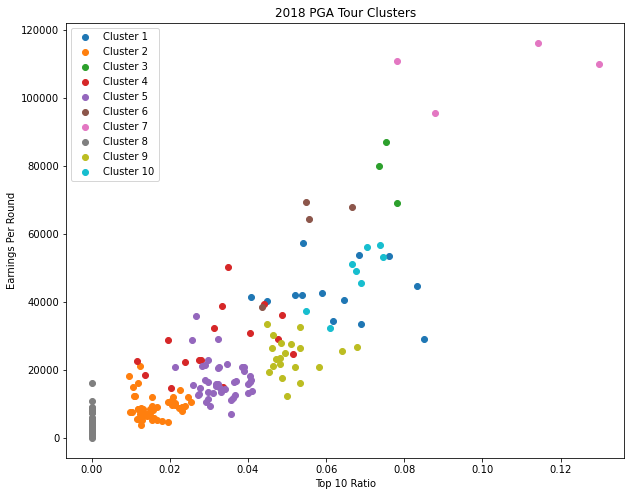

In [8]:
features = clean_df[['Top 10 Ratio', 'Earnings Per Round']]
cluster_labels = clean_df['Cluster']

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot points based on the clusters
for cluster in range(0,10):
    cluster_points = features[cluster_labels == cluster]
    plt.scatter(cluster_points['Top 10 Ratio'], cluster_points['Earnings Per Round'], label=f'Cluster {cluster + 1}')

plt.xlabel('Top 10 Ratio')
plt.ylabel('Earnings Per Round')
plt.title('2018 PGA Tour Clusters')
plt.legend()
plt.show()
